In [1]:
import numpy as np
import pandas as pd
import os, re, time
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, LSTM, Embedding, Dropout
from keras.preprocessing.text import Tokenizer
#from keras.preprocessing.sequence import pad_sequences
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

2023-05-23 14:55:30.932724: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarni

In [21]:
!pip install nltk

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 16.7 MB/s eta 0:00:0000:010:01


In [49]:
# import nltk
# nltk.download('popular', halt_on_error=False)
# nltk.download('all', halt_on_error=False)

In [3]:
#pip install --upgrade keras

In [4]:
#pip install --upgrade tensorflow

In [37]:
mbti_df=pd.read_csv("mbti_1.csv")

In [38]:
mbti_df.head()

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...


In [39]:
mbti_df.iloc[4,1]

"'You're fired.|||That's another silly misconception. That approaching is logically is going to be the key to unlocking whatever it is you think you are entitled to.   Nobody wants to be approached with BS...|||But guys... he REALLY wants to go on a super-duper-long-ass vacation. C'mon guys. His boss just doesn't listen or get it. He even approached him logically and everything.|||Never mind. Just go on permanent vacation.|||Two months? I wouldn't be crazy about the idea. If you are really his best employee, then that's what may be cooking him. Who wants their most reliable asset gone for that long?  ENTJ employer...|||Lol. Its not like our views were unsolicited. What a victim.|||Sometimes I just really like impoverished rap music.   https://www.youtube.com/watch?v=Xh0vA6_8mv8|||I probably would have lost it too. His stonewalling was insignificant. He was being an idiot over semantics that didn't have any impact on anything. It's one thing to stone wall on critical shit, but...|||I wo

### Data Cleaning (Feature Engineering and Transformations)

In [40]:
import re 

mbti_df['text_cleaned'] = mbti_df['posts'].apply(lambda x: re.sub(r'\|\|\|',' ',str(x)))
mbti_df['text_cleaned'] = mbti_df['text_cleaned'].apply(lambda x: re.sub(r'https\S+|http\S+|www\S+|@\w+|\n|\xa0|\t|\r','',str(x)))
#mbti_df['text_cleaned'] = mbti_df['text_cleaned'].apply(lambda x: re.sub(r'ENFJ|ENFP|ENTJ|ENTP|ESFJ|ESFP|ESTJ|ESTP|INFJ|INFP|INTJ|INTP|ISFJ|ISFP|ISTJ|ISTP', '', str(x)))
mbti_df['text_cleaned'] = mbti_df['text_cleaned'].apply(lambda x: re.sub(r'\b\d{3}[-.]?\d{3}[-.]?\d{4}[A-Za-z]*\b', '', str(x)))
mbti_df['text_cleaned'] = mbti_df['text_cleaned'].apply(lambda x: re.sub(r'#\S+','',str(x)))


In [41]:
mbti_df.iloc[4,2]

"'You're fired. That's another silly misconception. That approaching is logically is going to be the key to unlocking whatever it is you think you are entitled to.   Nobody wants to be approached with BS... But guys... he REALLY wants to go on a super-duper-long-ass vacation. C'mon guys. His boss just doesn't listen or get it. He even approached him logically and everything. Never mind. Just go on permanent vacation. Two months? I wouldn't be crazy about the idea. If you are really his best employee, then that's what may be cooking him. Who wants their most reliable asset gone for that long?  ENTJ employer... Lol. Its not like our views were unsolicited. What a victim. Sometimes I just really like impoverished rap music.    I probably would have lost it too. His stonewalling was insignificant. He was being an idiot over semantics that didn't have any impact on anything. It's one thing to stone wall on critical shit, but... I would have just taken the project and gave them something lat

In [ ]:
#Removing stopwords, punctuations, numerals from descriptions and converting to lowercase

#stopwords = stopwords.words('english')
stopwords = set(nltk.corpus.stopwords.words('english'))

mbti_df['tokens_text'] = mbti_df['text_cleaned'].apply(lambda x: nltk.tokenize.word_tokenize(x))

# Remove single-character tokens (mostly punctuation)
mbti_df['tokens_text'] = mbti_df['tokens_text'].apply(lambda x:[word for word in x if len(word) > 1])

# Remove numbers
mbti_df['tokens_text'] = mbti_df['tokens_text'].apply(lambda x:[word for word in x if not word.isnumeric()])

# Remove punctuation
mbti_df['tokens_text'] = mbti_df['tokens_text'].apply(lambda x:[word for word in x if word.isalpha()])

# Lowercase all words (default_stopwords are lowercase too)
mbti_df['tokens_text'] = mbti_df['tokens_text'].apply(lambda x:[word.lower() for word in x])

# Remove stopwords
mbti_df['tokens_text'] = mbti_df['tokens_text'].apply(lambda x:[word for word in x if word not in stopwords])

mbti_df['text_cleaned']=mbti_df.tokens_text.apply(lambda x: " ".join(x))


# wnl = nltk.WordNetLemmatizer()

# # Lemmatization for comments

# mbti_df['tokens_text'] = mbti_df['tokens_text'].apply(lambda x:[wnl.lemmatize(t) for t in x])

# mbti_df['text_lemmatized']=mbti_df.tokens_text.apply(lambda x: " ".join(x))


## Exploratory Data Analysis

In [ ]:
mbti_df.loc[4,'text_cleaned']

In [14]:
mbti_df.shape

(8675, 5)

In [15]:
mbti_df.isnull().any()

type               False
posts              False
text_cleaned       False
tokens_text        False
text_lemmatized    False
dtype: bool

In [52]:
mbti_df.describe(include=['object'])


,type,posts,text_cleaned,tokens_text
count,8675,8675,8675,8675
unique,16,8675,8675,8675
top,INFP,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,enfp intj moments sportscenter top ten plays p...,"[enfp, intj, moments, sportscenter, top, ten, ..."
freq,1832,1,1,1


In [51]:
total = mbti_df.groupby(['type']).count()*50
print("The Total Posts for every Personality Type")
total

The Total Posts for every Personality Type


,posts,text_cleaned,tokens_text,type_index
type,,,,
ENFJ,9500,9500,9500,9500
ENFP,33750,33750,33750,33750
ENTJ,11550,11550,11550,11550
ENTP,34250,34250,34250,34250
ESFJ,2100,2100,2100,2100
ESFP,2400,2400,2400,2400
ESTJ,1950,1950,1950,1950
ESTP,4450,4450,4450,4450
INFJ,73500,73500,73500,73500


#### Each row contains a person's MBTI and a section of each of the last 50 things they have posted (Each entry separated by "|||" (3 pipe characters))

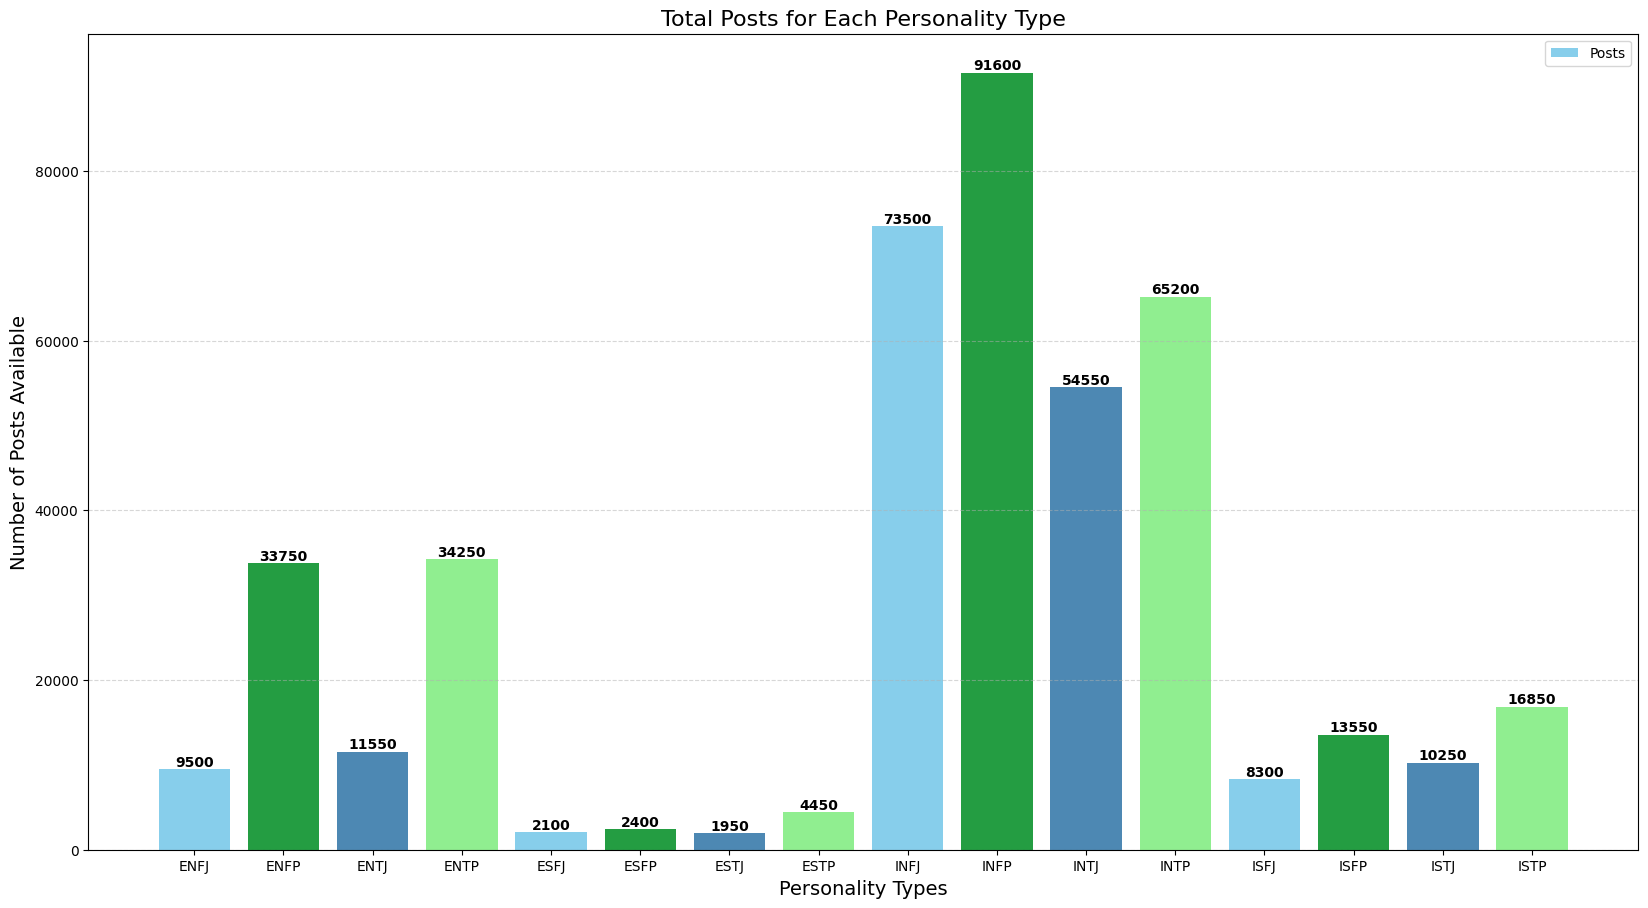

In [53]:
## Data visualization

colors = ['skyblue', '#249d42', '#4d88b3', 'lightgreen']
plt.figure(figsize=(20, 12))
plt.subplots_adjust(bottom=0.2)
plt.bar(np.array(total.index), height=total['text_cleaned'], color=colors)
plt.grid(axis='y', linestyle='--', alpha=0.5)
for i, v in enumerate(total['text_cleaned']):
    plt.text(i, v, str(v), ha='center', va='bottom', fontweight='bold')
plt.xlabel('Personality Types', size=14)
plt.ylabel('Number of Posts Available', size=14)
plt.title('Total Posts for Each Personality Type', size=16)
plt.legend(['Posts'], loc='upper right')

plt.savefig('Graph1.png')


#### This shows that the dataset is imbalanced across all classes, with INFP being the highest. Also, since the dataset doesn't have a lot of features, there's a need to create additional features to study the dataset before the modeling and analysis.

In [21]:
import seaborn as sns

/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 66.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 42.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 62.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 55.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/opt/conda/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 8.7% of the points cannot be place

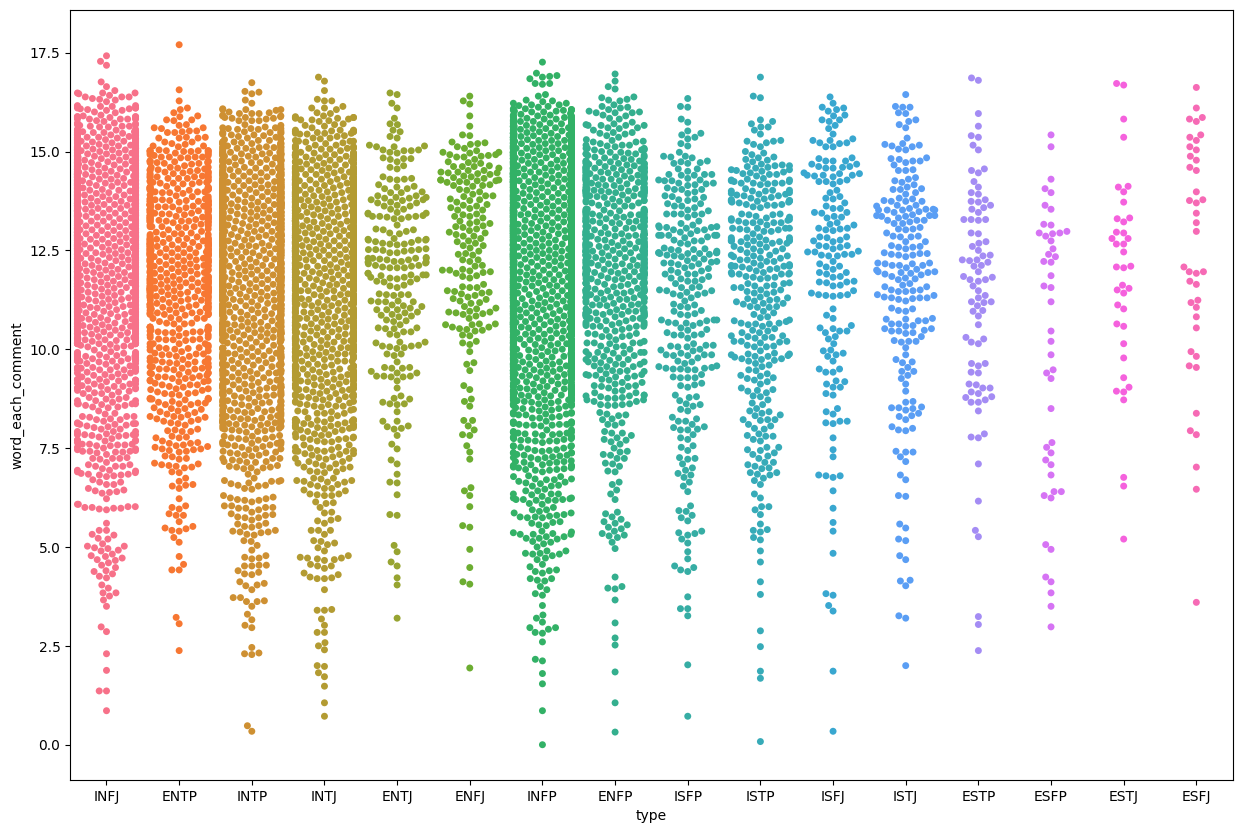

In [54]:
mbti_copy = mbti_df.copy()

#Count Number words for each post of a user
def var_row(row):
    l = []
    for i in row.split('|||'):
        l.append(len(i.split()))
    return np.var(l)

#Count Number words per post for total 50 posts in whole row
mbti_copy['word_each_comment'] = mbti_copy['text_cleaned'].apply(lambda x: len(x.split())/50)
mbti_copy['variance_word_count'] = mbti_copy['text_cleaned'].apply(lambda x: var_row(x))

plt.figure(figsize=(15,10))
sns.swarmplot(x="type",y= "word_each_comment", hue="type", legend= False, data=mbti_copy)


plt.savefig('Graph2.png')


#### The above graph visualizes the relationship between the MBTI personality type and the average number of words per comment. We see that INFP was more dense than most of the other classes representing more words per comment.

/var/tmp/ipykernel_1974/2633758522.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(mbti_df["length_posts"]).set_title("Distribution of Lengths of all 50 Posts")


Text(0.5, 1.0, 'Distribution of Lengths of all 50 Posts')

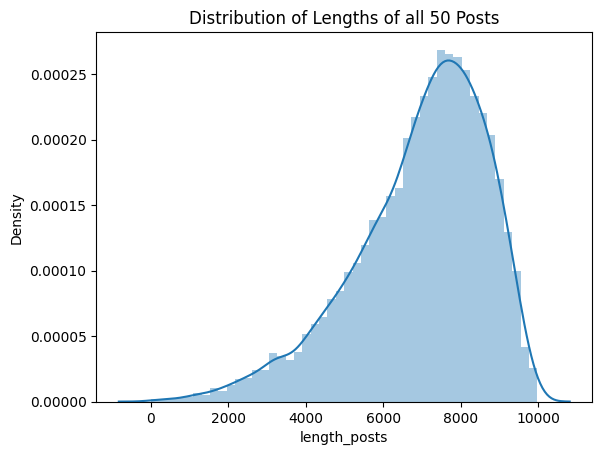

In [23]:
mbti_df["length_posts"] = mbti_df["text_cleaned"].apply(len)
sns.distplot(mbti_df["length_posts"]).set_title("Distribution of Lengths of all 50 Posts")

### Most people in our datset have between 7000-9000 words on social media

In [24]:
from collections import Counter


#Finding the most common words in all posts.
words = list(mbti_df["text_lemmatized"].apply(lambda x: x.split()))
words = [x for y in words for x in y]
Counter(words).most_common(50)


[('like', 70584),
 ('think', 50848),
 ('people', 47947),
 ('one', 39738),
 ('would', 39228),
 ('know', 38127),
 ('really', 35275),
 ('thing', 34443),
 ('time', 33267),
 ('get', 33204),
 ('feel', 25598),
 ('type', 23515),
 ('make', 23498),
 ('much', 23070),
 ('say', 22632),
 ('well', 22414),
 ('friend', 21810),
 ('way', 21700),
 ('love', 21496),
 ('want', 21135),
 ('good', 20630),
 ('see', 19473),
 ('something', 19428),
 ('also', 18301),
 ('lot', 18162),
 ('could', 17368),
 ('go', 17273),
 ('even', 16889),
 ('always', 16779),
 ('life', 16219),
 ('someone', 16201),
 ('never', 15196),
 ('though', 14646),
 ('find', 14365),
 ('year', 14089),
 ('thought', 13809),
 ('need', 13505),
 ('actually', 13196),
 ('infp', 12967),
 ('person', 12901),
 ('ca', 12784),
 ('work', 12763),
 ('right', 12738),
 ('going', 12650),
 ('sure', 12627),
 ('first', 12574),
 ('yes', 12361),
 ('pretty', 12321),
 ('mean', 11996),
 ('infj', 11888)]

In [26]:
!pip install wordcloud

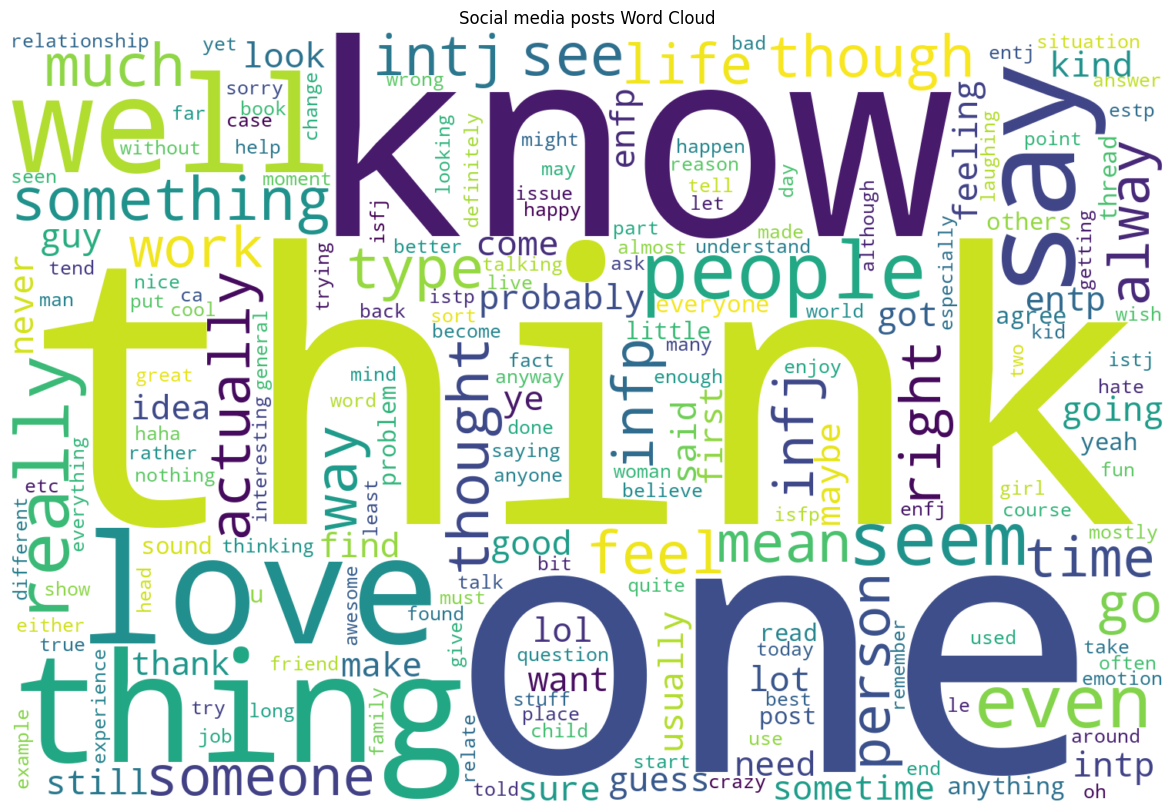

In [27]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate the words from the 'Entity' column in positive_ner_df
mbti_words = ' '.join(mbti_df['text_cleaned'])

# Generate the word cloud
wordcloud = WordCloud(width=1500, height=1000, background_color='white').generate(mbti_words)

# Plot the word cloud
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Social media posts Word Cloud')
plt.axis('off')
plt.show()


/var/tmp/ipykernel_1974/850583542.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4,4,k+1)


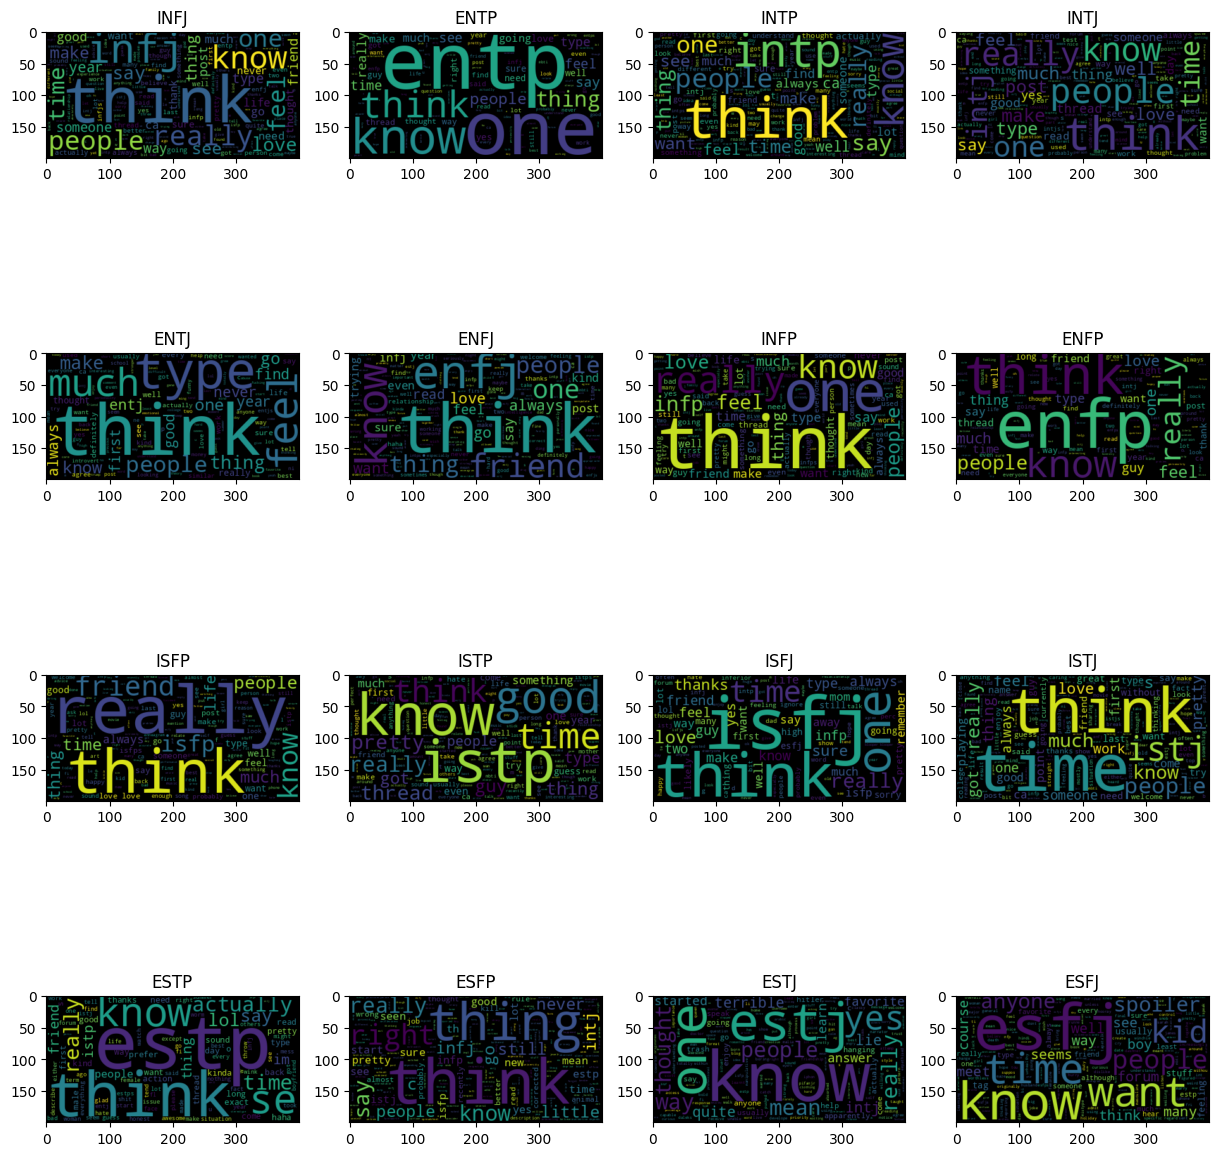

In [28]:
fig, ax = plt.subplots(len(mbti_df['type'].unique()), figsize=(15,len(mbti_df['type'].unique())))
k = 0
for i in mbti_df['type'].unique():
    df_4 = mbti_df[mbti_df['type'] == i]
    wordcloud = WordCloud(max_words=1628,relative_scaling=1,normalize_plurals=False).generate(df_4['text_cleaned'].to_string())
    plt.subplot(4,4,k+1)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(i)
    ax[k].axis("off")
    k+=1

In [29]:
#add columns for personality type indicators

def get_types(row):
    t=row['type']

    I = 0; N = 0
    T = 0; J = 0
    
    if t[0] == 'I': I = 1
    elif t[0] == 'E': I = 0
    else: print('I-E not found') 
        
    if t[1] == 'N': N = 1
    elif t[1] == 'S': N = 0
    else: print('N-S not found')
        
    if t[2] == 'T': T = 1
    elif t[2] == 'F': T = 0
    else: print('T-F not found')
        
    if t[3] == 'J': J = 1
    elif t[3] == 'P': J = 0
    else: print('J-P not found')
    return pd.Series( {'IE':I, 'NS':N , 'TF': T, 'JP': J }) 

mbti_type = mbti_df.join(mbti_df.apply (lambda row: get_types (row),axis=1))
mbti_type.head(5)

,type,posts,text_cleaned,tokens_text,text_lemmatized,length_posts,IE,NS,TF,JP
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,' enfp and intj moments sportscenter not t...,"[enfp, intj, moment, sportscenter, top, ten, p...",enfp intj moment sportscenter top ten play pra...,3326,1,1,0,1
1,ENTP,'I'm finding the lack of me in these posts ver...,'I'm finding the lack of me in these posts ver...,"[finding, lack, post, alarming, sex, boring, p...",finding lack post alarming sex boring position...,6361,0,1,1,0
2,INTP,'Good one _____ https://www.youtube.com/wat...,"'Good one _____ Of course, to which I say ...","[one, course, say, know, blessing, curse, abso...",one course say know blessing curse absolutely ...,4966,1,1,1,0
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...","'Dear INTP, I enjoyed our conversation the o...","[intp, enjoyed, conversation, day, esoteric, g...",intp enjoyed conversation day esoteric gabbing...,6087,1,1,1,1
4,ENTJ,'You're fired.|||That's another silly misconce...,'You're fired. That's another silly misconcept...,"[fired, another, silly, misconception, approac...",fired another silly misconception approaching ...,5615,0,1,1,1


In [30]:
#Counting Number posts in one class | Total Number posts in other class

print ("Introversion (I) |  Extroversion (E): \t", mbti_type['IE'].value_counts()[0], " | ", mbti_type['IE'].value_counts()[1])
print ("Intuition    (N) |  Sensing      (S): \t", mbti_type['NS'].value_counts()[0], " | ", mbti_type['NS'].value_counts()[1])
print ("Thinking     (T) |  Feeling      (F): \t", mbti_type['TF'].value_counts()[0], " | ", mbti_type['TF'].value_counts()[1])
print ("Judging      (J) |  Perceiving   (P): \t", mbti_type['JP'].value_counts()[0], " | ", mbti_type['JP'].value_counts()[1])


Introversion (I) |  Extroversion (E): 	 1999  |  6676
Intuition    (N) |  Sensing      (S): 	 1197  |  7478
Thinking     (T) |  Feeling      (F): 	 4694  |  3981
Judging      (J) |  Perceiving   (P): 	 5241  |  3434


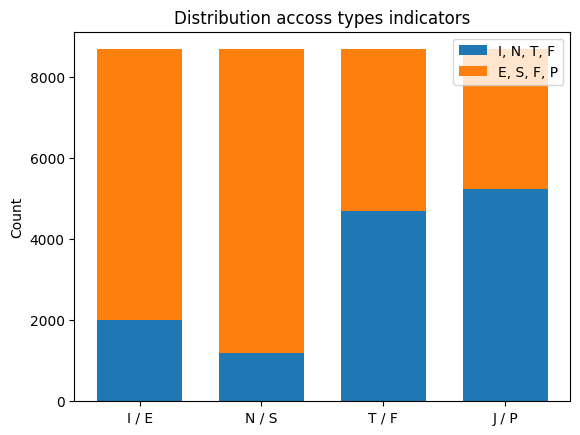

In [31]:
#Plotting the distribution of each personality type indicator
N = 4
bottom = (mbti_type['IE'].value_counts()[0], mbti_type['NS'].value_counts()[0], mbti_type['TF'].value_counts()[0], mbti_type['JP'].value_counts()[0])
top = (mbti_type['IE'].value_counts()[1], mbti_type['NS'].value_counts()[1], mbti_type['TF'].value_counts()[1], mbti_type['JP'].value_counts()[1])

ind = np.arange(N)    # the x locations for the groups
# the width of the bars
width = 0.7

p1 = plt.bar(ind, bottom, width, label="I, N, T, F")
p2 = plt.bar(ind, top, width, bottom=bottom, label="E, S, F, P") 

plt.title('Distribution accoss types indicators')
plt.ylabel('Count')
plt.xticks(ind, ('I / E',  'N / S', 'T / F', 'J / P',))
plt.legend()

plt.show()

### Converting personality types to numerical categories

In [44]:
types = np.unique(mbti_df.type.values)

In [45]:
def get_type_index(string):
    return list(types).index(string)

In [46]:
mbti_df['type_index'] = mbti_df['type'].apply(get_type_index)

In [47]:
mbti_df.to_csv("01_MBTI_DataCleaned.csv", index= False)

In [48]:
mbti_df.head()

,type,posts,text_cleaned,tokens_text,type_index
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...,enfp intj moments sportscenter top ten plays p...,"[enfp, intj, moments, sportscenter, top, ten, ...",8
1,ENTP,'I'm finding the lack of me in these posts ver...,finding lack posts alarming sex boring positio...,"[finding, lack, posts, alarming, sex, boring, ...",3
2,INTP,'Good one _____ https://www.youtube.com/wat...,one course say know blessing curse absolutely ...,"[one, course, say, know, blessing, curse, abso...",11
3,INTJ,"'Dear INTP, I enjoyed our conversation the o...",intp enjoyed conversation day esoteric gabbing...,"[intp, enjoyed, conversation, day, esoteric, g...",10
4,ENTJ,'You're fired.|||That's another silly misconce...,fired another silly misconception approaching ...,"[fired, another, silly, misconception, approac...",2
